In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


import re

# Enables interactive figures
# import mpld3

%matplotlib notebook
import matplotlib.pyplot as plt

#mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [9.5, 6]

In [2]:
os.chdir('/home/elron/Dataanalytics/Project')

## Extra column and two lists to iterate over for plots

In [3]:
df = pd.read_pickle('processData_df7_elron_for analyis.pkl')

# create a 'month_year' column for grouping
df['ps_datum'] = pd.to_datetime(df['ps_datum'], format='%Y-%m-%d %H:%M:%S')
df['month_year'] = df['ps_datum'].map(lambda x: x.strftime('%Y-%m'))

# productnameslist
newProductNames = ["S085 HR 4040","S400 HR","S440 HR",
"S085 HF 4040","S400 HF","S440 HF","B400 HP","B440 HP","B085 HF 4040","B400 HF","B440 HF","B085 FR 4040","B370 FR",
"B400 FR ASD","B400 FR","B085 LE 4040","B400 LE","B400 LE ASD","B440 LE","B085 ULP 4040","B400 ULP ASD","B440 ULP"]

monthList = list(df.loc[:,'month_year'].unique()) 

## Creating distributionplots with above barplots

In [ ]:
for i in newProductNames:
    os.mkdir(('/home/elron/Dataanalytics/Project/plots/%s') % (i))
    for j in monthList:       
        try:            
            with PdfPages('/home/elron/Dataanalytics/Project/plots/{}/{}_{}.pdf'.format(i,i,j)) as pdf:
        
                x = df[(df['month_year'] == j) & (df['p_product'] == i)]['qc_salzrckhalt']
                x1 = x[x!=0] # drop of all 0 values
                
                n+=1
                f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
                sns.boxplot(x1, ax=ax_box)
                sns.distplot(x1, ax=ax_hist)
                
                plt.title("Salzrückhalt for Producttype {} in period {}" .format (i,j))
                ax_box.set(xlabel='')
                
                pdf.savefig()
                
        except FileNotFoundError:
            continue

## See if ps there is a dependency between ps process paramter and salzrückhalt

In [4]:
# Create mean ps_temp and mean ps_feuchtigkeit column for analyis
df1 = df.copy()

df1['ps_badtemp_mean'] = df1.loc[:,'ps_bad_temperatur_500m_c':'ps_bad_temperatur_4000m_c'].mean(axis = 1)
df1['ps_feuchtigkeit_mean'] = df1.loc[:,'ps_auftragswerk_feuchtigkeit_0m_%':'ps_auftragswerk_feuchtigkeit_4200m_%'].mean(axis = 1)

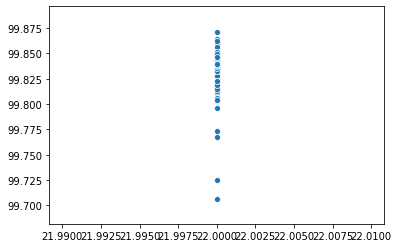

In [7]:
# check for linear dependy between salzrückhalt and ps_temp or ps_feuchtigkeit 
# timepoint 2018-04 for producttyp S400 HF chosen, because of low dispersion of salzrückhalt
x = np.array(df1[(df1.month_year =="2018-04") & (df1.p_product =="S400 HF")]['ps_badtemp_mean'])
y = np.array(df1[(df1.month_year =="2018-04") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])

sns.scatterplot(x = x, y=y )

In [ ]:
# no linear dependency between salzrückhalt and badtemp for this producttyp

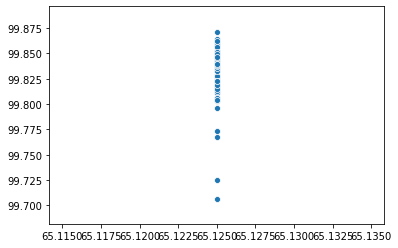

In [8]:
x = np.array(df1[(df1.month_year =="2018-04") & (df1.p_product =="S400 HF")]['ps_feuchtigkeit_mean'])
y = np.array(df1[(df1.month_year =="2018-04") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])

sns.scatterplot(x = x, y=y )

In [ ]:
# no linear dependency between salzrückhalt and feuchtigkeit for this producttyp

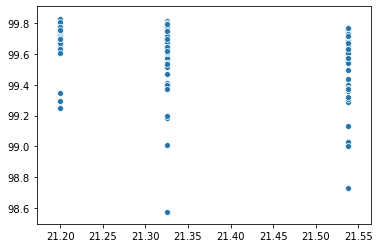

In [9]:
# check for linear dependy between salzrückhalt and ps_temp or ps_feuchtigkeit 
# timepoint 2019-07 for producttyp S400 HF chosen, because of low dispersion of salzrückhalt
x = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['ps_badtemp_mean'])
y = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])

sns.scatterplot(x = x, y=y )

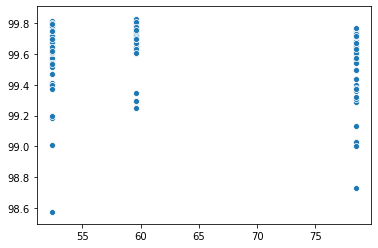

In [10]:
x = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['ps_feuchtigkeit_mean'])
y = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])

sns.scatterplot(x = x, y=y )

## check for polynominal dependency of salzrückhalt and ps_temp or ps_feuchtigkeit

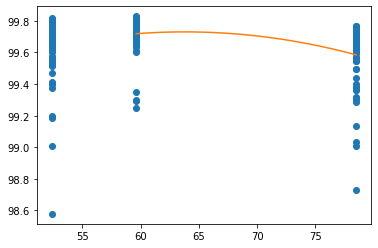

In [14]:
x = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['ps_feuchtigkeit_mean'])
y = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])
z = np.polyfit(x,y,2)

f= np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o',x_new, y_new)

#sns.scatterplot(x = x_new, y=y_new)

## See if there is a dependency between pa process paramter and salzrückhalt

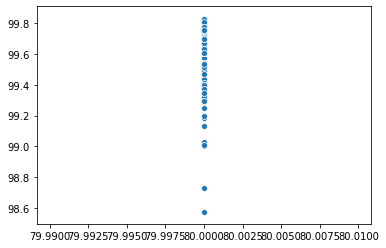

In [16]:
# create mean of air_knife vor amin bad

df1['pa_airknife_vor_amin_bad_mean'] = df1.loc[:,'pa_air-knife_vor_amin_bad_0m_%':'pa_air-knife_vor_amin_bad_4200m_%'].mean(axis = 1)
x = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['pa_airknife_vor_amin_bad_mean'])
y = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])

sns.scatterplot(x = x, y=y )

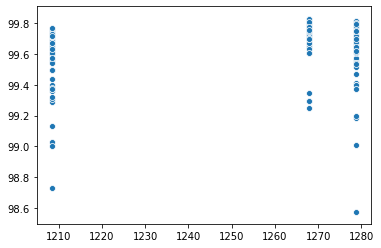

In [17]:
df1['pa_chlorkonzentration_mean'] = df1.loc[:,'pa_chlorkonzentration_0m_ppm':'pa_chlorkonzentration_4000m_ppm'].mean(axis = 1)
x = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['pa_chlorkonzentration_mean'])
y = np.array(df1[(df1.month_year =="2019-07") & (df1.p_product =="S400 HF")]['qc_salzrckhalt'])


sns.scatterplot(x = x, y=y )

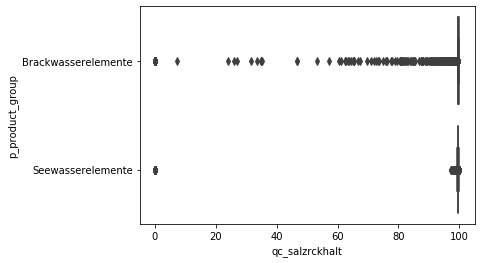

In [18]:
box = sns.boxplot(x='qc_salzrckhalt', y='p_product_group', data=df)